In [1]:
# Montar Google Drive para cargar el archivo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar bibliotecas esenciales
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install openpyxl




In [3]:
# Asegúrate de usar la ruta correcta
data = pd.read_excel('/content/personas.xlsx')  # Cambia la ruta si es diferente

# Revisa las primeras filas del archivo
print(data.head())



   dominio  areag  factor     upm  hogar_num  id  P03A02  P03A03  P03A05  \
0        1      1     386  100011       2721   1       2      75       1   
1        1      1     386  100011       2721   2       1      35       3   
2        1      1     386  100011       2721   3       2      35       4   
3        1      1     386  100011       2721   4       2      15       5   
4        1      1     386  100011       5021   1       2      75       1   

   P03A06  ...  P07A12C  P07A12D  P07A12E  pet  pea  Ocupados  Desocupados  \
0       3  ...      NaN      NaN      NaN  1.0  NaN       NaN          NaN   
1       3  ...      NaN      NaN      NaN  1.0  1.0       1.0          NaN   
2       3  ...      NaN      NaN      NaN  1.0  NaN       NaN          NaN   
3       3  ...      NaN      NaN      NaN  1.0  NaN       NaN          NaN   
4       3  ...      NaN      NaN      NaN  1.0  NaN       NaN          NaN   

   Subvisibles  Inactivos  formalidad  
0          NaN        1.0         

In [8]:
# Seleccionamos algunas columnas como ejemplo
features = ['areag', 'P03A02', 'P03A03', 'P03A05', 'pet']
target = 'formalidad'  # Variable objetivo

# Filtrar el DataFrame
df = data[features + [target]]
print(df.head())



   areag  P03A02  P03A03  P03A05  pet  formalidad
0      1       2      75       1  1.0         NaN
1      1       1      35       3  1.0         2.0
2      1       2      35       4  1.0         NaN
3      1       2      15       5  1.0         NaN
4      1       2      75       1  1.0         NaN


In [9]:
# Revisar valores nulos
print(df.isnull().sum())

# Opcional: Eliminar filas con valores nulos
df = df.dropna()

# O rellena con un valor específico, como la mediana
# df = df.fillna(df.median())


areag             0
P03A02            0
P03A03            0
P03A05            0
pet            2748
formalidad    11481
dtype: int64


In [10]:
# Por ejemplo, convertir variables categóricas con one-hot encoding
df = pd.get_dummies(df, columns=['areag', 'P03A02', 'pet'], drop_first=True)
print(df.head())


    P03A03  P03A05  formalidad  areag_2  P03A02_2
1       35       3         2.0    False     False
6       58       2         2.0    False      True
7       32       3         2.0    False     False
8       60       1         2.0    False     False
10      24       5         2.0    False      True


In [11]:
from sklearn.model_selection import train_test_split

# Dividir en características (X) y etiqueta (y)
X = df.drop(target, axis=1)
y = df[target]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
!pip install tensorflow


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Revisar los tipos de datos
print(X_train.dtypes)
print(y_train.dtypes)



P03A03      int64
P03A05      int64
areag_2      bool
P03A02_2     bool
dtype: object
float64


In [15]:
# Convertir columnas booleanas a enteros
X_train = X_train.astype({'areag_2': int, 'P03A02_2': int})
X_test = X_test.astype({'areag_2': int, 'P03A02_2': int})


In [16]:
print(X_train.dtypes)
print(X_test.dtypes)


P03A03      int64
P03A05      int64
areag_2     int64
P03A02_2    int64
dtype: object
P03A03      int64
P03A05      int64
areag_2     int64
P03A02_2    int64
dtype: object


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Crear y ajustar el escalador
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4076 - loss: 0.4480 - val_accuracy: 0.6743 - val_loss: -2.1206
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6752 - loss: -5.5349 - val_accuracy: 0.6743 - val_loss: -26.7838
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - loss: -44.8188 - val_accuracy: 0.6743 - val_loss: -108.6081
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6681 - loss: -146.7339 - val_accuracy: 0.6743 - val_loss: -279.8119
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - loss: -347.0494 - val_accuracy: 0.6743 - val_loss: -563.3965
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6567 - loss: -694.0228 - val_accuracy: 0.6743 - val_loss: -969.2778
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6626 - loss: -1146.9305 - val_accuracy: 0.6743 - val_loss: -1515.6671
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.663

In [19]:
# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida: {loss}")
print(f"Precisión: {accuracy}")


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - loss: -241009.3750
Pérdida: -239795.078125
Precisión: 0.6774008274078369


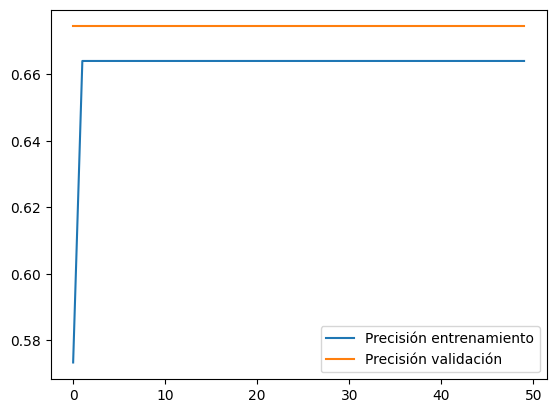

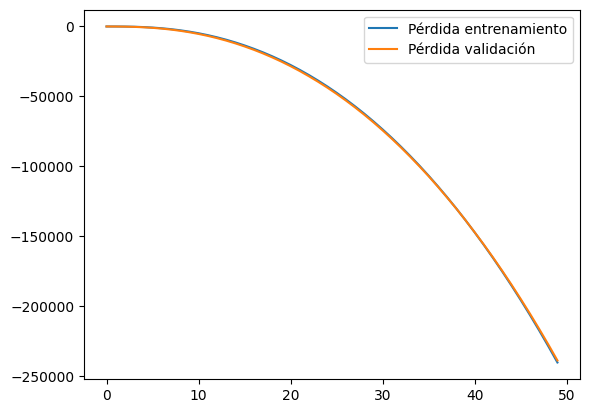

In [20]:
import matplotlib.pyplot as plt

# Gráfico de precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.legend()
plt.show()

# Gráfico de pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.legend()
plt.show()


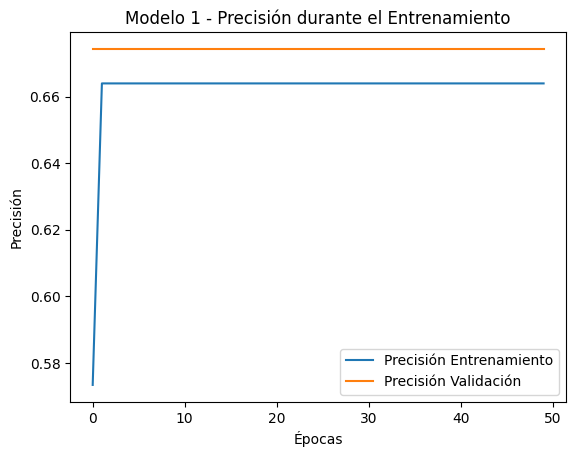

In [30]:
import matplotlib.pyplot as plt

# Gráfico de precisión y pérdida del Modelo 1
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.legend()
plt.title('Modelo 1 - Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.show()

